<a href="https://colab.research.google.com/github/fradjmag38/CodeClauseInternship_SalesPredictor/blob/main/sales%20forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project, Sales Predictor, aims to develop a predictive model for forecasting sales based on the M5 Forecasting Competition dataset available on Kaggle
and to Access the M5 Forecasting Competition dataset on Kaggle click on the following link:https://www.kaggle.com/competitions/m5-forecasting-accuracy/data



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [ ]:
def dis_data(data,msg):
  print("\t data frame name is {}".format(msg))
  row = len(data)
  col = len(data.columns)
  print("number of rows", row)
  print("number of columns", col)
  display(data.head())
  print(data.info())
  print(data.isnull().count())

In [ ]:
cal = pd.read_csv('/content/calendar.csv')
stv = pd.read_csv('/content/sales_train_validation.csv')
ste = pd.read_csv('/content/sales_train_evaluation.csv')
sp = pd.read_csv('/content/sell_prices.csv')

In [ ]:
dis_data(cal, "1.calendar")
dis_data(stv, "2.sales train validation")
dis_data(ste, "3.sales train evaluation")
dis_data(sp, "4.sell prices")

	 data frame name is 1.calendar
number of rows 1969
number of columns 14


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None
date            1969
wm_yr_wk        1969
weekday         1969
wday            1969
month           1969
year            1969
d               1969
event_name_1    1

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Columns: 1919 entries, id to d_1913
dtypes: float64(795), int64(1118), object(6)
memory usage: 11.7+ MB
None
id          799
item_id     799
dept_id     799
cat_id      799
store_id    799
           ... 
d_1909      799
d_1910      799
d_1911      799
d_1912      799
d_1913      799
Length: 1919, dtype: int64
	 data frame name is 3.sales train evaluation
number of rows 788
number of columns 1947


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1.0,1.0,0.0,4.0,0.0,1.0,3.0,0.0,2.0,6.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Columns: 1947 entries, id to d_1941
dtypes: float64(1588), int64(353), object(6)
memory usage: 11.7+ MB
None
id          788
item_id     788
dept_id     788
cat_id      788
store_id    788
           ... 
d_1937      788
d_1938      788
d_1939      788
d_1940      788
d_1941      788
Length: 1947, dtype: int64
	 data frame name is 4.sell prices
number of rows 104436
number of columns 4


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325.0,9.58
1,CA_1,HOBBIES_1_001,11326.0,9.58
2,CA_1,HOBBIES_1_001,11327.0,8.26
3,CA_1,HOBBIES_1_001,11328.0,8.26
4,CA_1,HOBBIES_1_001,11329.0,8.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    104436 non-null  object 
 1   item_id     104436 non-null  object 
 2   wm_yr_wk    104435 non-null  float64
 3   sell_price  104435 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.2+ MB
None
store_id      104436
item_id       104436
wm_yr_wk      104436
sell_price    104436
dtype: int64


In [ ]:
def reduce_mem_use(data,category=False):
  first_mem=data.memory_usage().sum()/1024 ** 2
  print('Memory usage is {:.2f} MB'.format(first_mem))

  for col in data.columns:
    col_type = data[col].dtype

    if col_type != object:
      c_min = data[col].min()
      c_max = data[col].max()
      if str(col_type)[:3] =='int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          data[col]=data[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          data[col]=data[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          data[col]=data[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          data[col]=data[col].astype(np.int64)
        else:
          if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
           data[col]=data[col].astype(np.float16)
          elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
           data[col]=data[col].astype(np.int8)
          else:
            data[col] = data[col].astype(np.float64)
      else:
        if category:
          data[col] = data[col].astype('category')
    last_mem = data.memory_usage().sum() /1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(last_mem))
    print('decreased by {: .1f}%'.format(100 *(first_mem - last_mem)/ first_mem))
    return data

In [ ]:
import gc #garbage collector
sp=reduce_mem_use(sp)
ste = reduce_mem_use(ste)
stv = reduce_mem_use(stv)
cal = reduce_mem_use(cal)
gc.collect()

Memory usage is 3.19 MB
Memory usage after optimization is: 3.19 MB
decreased by  0.0%
Memory usage is 11.71 MB
Memory usage after optimization is: 11.71 MB
decreased by  0.0%
Memory usage is 11.70 MB
Memory usage after optimization is: 11.70 MB
decreased by  0.0%
Memory usage is 0.21 MB
Memory usage after optimization is: 0.21 MB
decreased by  0.0%


8

Create the function which create series(pivot)

In [ ]:
import pandas as pd

def create_series_data(data, cal, sp, include_events=False):
    # Melting the data
    df1 = pd.melt(data, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                  var_name='day', value_name='sales').dropna()

    # Adding calendar info
    df2 = df1.merge(cal, left_on='day', right_on='d', how='left')

    # Selecting useful columns
    if include_events:
        df3 = df2[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day', 'sales', 'date', 'wm_yr_wk',
                   'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']]
    else:
        df3 = df2[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day', 'sales', 'date', 'wm_yr_wk']]

    # Adding sales prices
    df4 = df3.merge(sp, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

    return df4



save the data in various forms as pickle file

In [ ]:
import pickle
def get_val_data(stv, cal, sp,include_events, data='val'):
  pickle_file = "val_data_{}{}.pkl".format(data, include_events)
  print(pickle_file)
  if os.path.exists(pickle_file):
    print("loading {}".format(pickle_file))
    val_data = pickle.load(open(pickle_file,"rb"))
  else:
    val_data = create_series_data(stv,cal,sp,include_events)
    pickle.dump(val_data, open(pickle_file, "wb"))
  return val_data
all_include_events = [True,False]
all_data_types = ['val','eval']
ss = stv
for i in [0,1]:
  for j in[0,1]:
    ss = stv
    if j==1:
      ss = ste
    print("iter = {} {}".format(i,j))
    val_data  = get_val_data(ss, cal, sp, all_include_events[i], all_data_types[j])
    gc.collect()

iter = 0 0
val_data_valTrue.pkl
iter = 0 1
val_data_evalTrue.pkl
iter = 1 0
val_data_valFalse.pkl
iter = 1 1
val_data_evalFalse.pkl


In [ ]:
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,NaN


In [ ]:
val_data = get_val_data(stv , cal, sp, False, 'val')
def summarize_columns(data):
  num_row = len(data)
  summary=pd.DataFrame(data.dtypes, columns=['dtypes'])
  summary = summary.reset_index()
  summary['col_name'] = summary['index']
  summary=summary[['col_name', 'dtypes']]
  summary['missing']=data.isnull().sum().values
  summary['missing_percent']=summary['missing'].apply(lambda x: round(x*100/num_row, 1))
  summary['uniques']=data.nunique().values
  summary['first Value']= data.iloc[0].values
  summary['second Value']= data.iloc[1].values
  summary['third Value']= data.iloc[2].values
  summary['forth Value']= data.iloc[3].values
  return summary

val_data_valFalse.pkl
loading val_data_valFalse.pkl


In [ ]:
summary_df = summarize_columns(val_data)
summary_df.head(10)

,col_name,dtypes,missing,missing_percent,uniques,first Value,second Value,third Value,forth Value
0,id,object,0,0.0,799,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation
1,item_id,object,0,0.0,799,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004
2,dept_id,object,0,0.0,3,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1
3,cat_id,object,0,0.0,2,HOBBIES,HOBBIES,HOBBIES,HOBBIES
4,store_id,object,0,0.0,1,CA_1,CA_1,CA_1,CA_1
5,state_id,object,0,0.0,1,CA,CA,CA,CA
6,day,object,0,0.0,1913,d_1,d_1,d_1,d_1
7,sales,float64,0,0.0,105,0.0,0.0,0.0,0.0
8,date,object,0,0.0,1913,2011-01-29,2011-01-29,2011-01-29,2011-01-29
9,wm_yr_wk,int64,0,0.0,274,11101,11101,11101,11101


group by store, state, dept and calendar

In [ ]:
state_dist = val_data.groupby(['state_id'])['sales'].sum().reset_index()
store_dist = val_data.groupby(['store_id'])['sales'].sum().reset_index()
dept_dist = val_data.groupby(['dept_id'])['sales'].sum().reset_index()
cat_dist = val_data.groupby(['cat_id'])['sales'].sum().reset_index()

display(state_dist)
display(store_dist)
display(dept_dist)
display(cat_dist)

,state_id,sales
0,CA,1348756.0


,store_id,sales
0,CA_1,1348756.0


,dept_id,sales
0,HOBBIES_1,821524.0
1,HOBBIES_2,55154.0
2,HOUSEHOLD_1,472078.0


,cat_id,sales
0,HOBBIES,876678.0
1,HOUSEHOLD,472078.0


  Visualizations

<Axes: xlabel='state_id'>

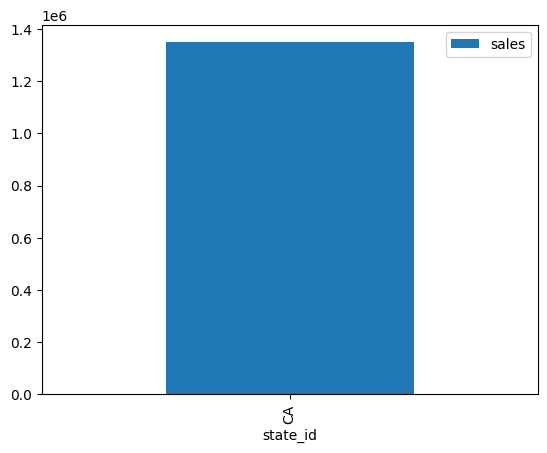

In [ ]:
state_dist.set_index('state_id').plot(kind='bar')

In [ ]:
#store_dist.set_index('store_dist').plot(kind='bar')

In [ ]:
#dept_dist.set_index('dept_dist').plot(kind='bar')

In [ ]:
#cat_dist.set_index('cat_dist').plot(kind='bar')

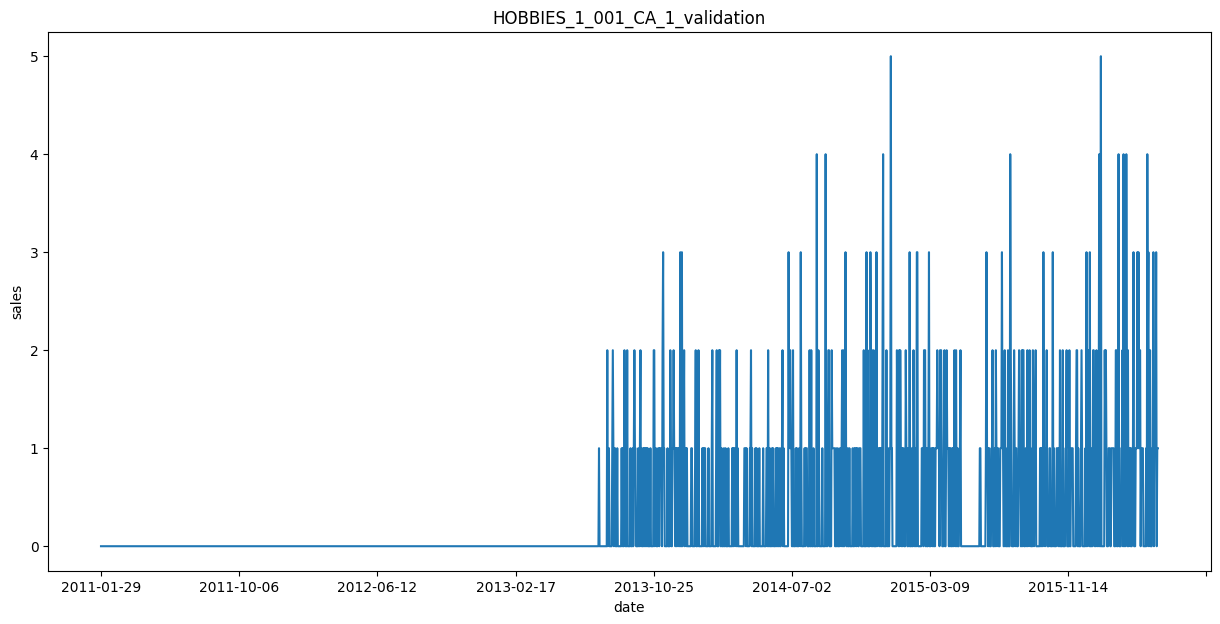

In [ ]:
# ploting individual series of an identifier
def plot_single_id(data, id, start='', end=''):
  row_mask = data['id'] == id
  tr_data = data[row_mask][['date', 'sales']].copy()
  tr_data.set_index('date', inplace=True)
  tr_data.loc[start:].sales.plot(figsize=(15,7),title=id,ylabel='sales')


plot_single_id(val_data, 'HOBBIES_1_001_CA_1_validation')


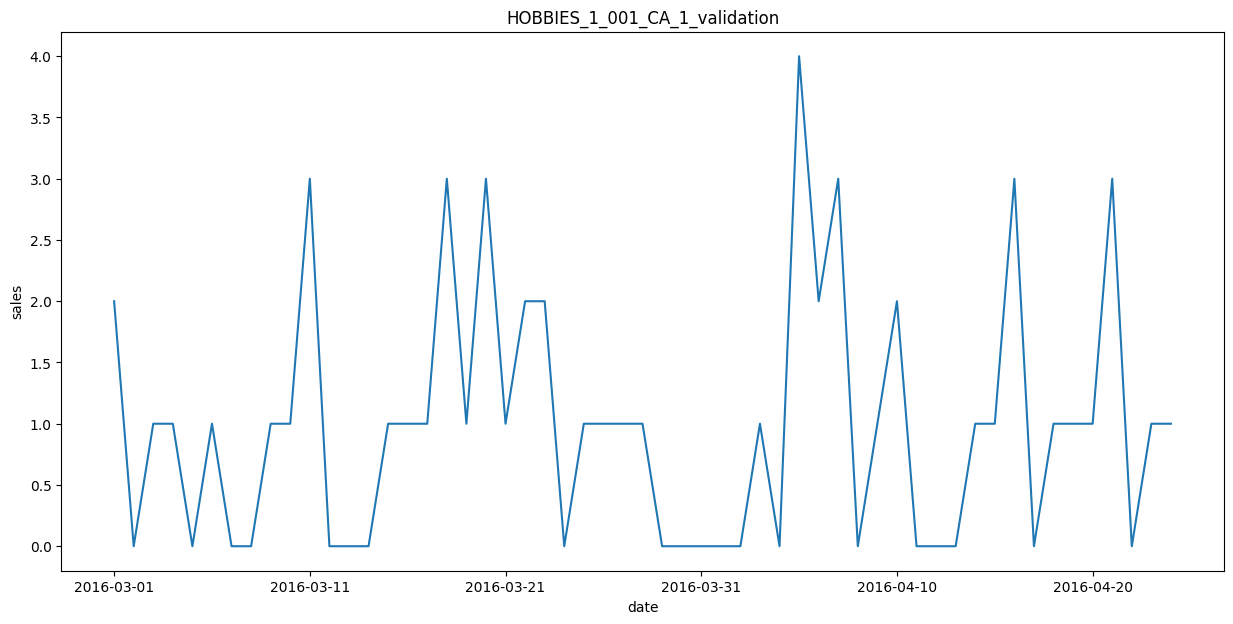

In [ ]:
plot_single_id(val_data,'HOBBIES_1_001_CA_1_validation',start='2016-03', end='2016-04')

Basic Prophet Model

In [ ]:
def get_prophet_item_data(data, id, for_prophet=True, freq=None):
  row_mask = data['id']==id
  tr_data = data[row_mask][['date', 'sales']].copy()
  tr_data.columns = ['ds','y']
  return tr_data

In [ ]:
from prophet import Prophet
id = 'HOBBIES_1_001_CA_1_validation'
def get_prophet_predictions(val_data, id):
  tr_data = get_prophet_item_data(val_data, id)
  m=Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
  m.fit(tr_data)
  future = m.make_future_dataframe(periods= 28, freq='D', include_history=False)
  forcast=m.predict(future)
  pred=forcast[['ds', 'yhat']].copy()
  pred['item_id']=id
  pred.columns = ['date', 'sales', 'id']
  pred= pred[['date', 'id', 'sales']]
  return pred

In [ ]:
from IPython.terminal.embed import warnings
import warnings
warnings.filterwarnings("ignore")
all_ids = list(val_data.id.unique())
all_ids = all_ids[:10]  # taking a sample of ids since we have 30490 id too much and take much time
from tqdm import tqdm
pred_res_list = []

for i in tqdm(range(len(all_ids))):
  pred= get_prophet_predictions(val_data, all_ids[i])
  pred_res_list.append(pred)


In [ ]:
combined_data = pd.concat(pred_res_list)
display(combined_data.head())
pivot_data = combined_data.pivot(index='id', columns='date', values='sales').reset_index()
pivot_data.columns= ['id'] + ['F' + str(x) for x in range(1,29)]
pivot_data['id']= pivot_data['id'].str.replace("validation", "evaluation")
pivot_data.head()

In [ ]:
ste_sub = ste[ste['id'].isin(list(pivot_data.id.unique()))]
display(ste_sub.head())
d_list = []
for i in range(1942-28, 1942,1):
  d_list.append("d_{}".format(i))

columns_to_select = ['id'] + d_list
ste_sub = ste_sub[columns_to_select]
display(ste_sub.head())

LightGBM Model

1-add lab data(28 days to 34 days)






In [ ]:
dayLags = [28, 29 ,30, 31, 32, 33, 34]
def add_lags(val_data, dayLags = [28, 29 ,30, 31, 32, 33, 34]):
  print('adding lag feature..')
  lagSalesCols =[f"lag_{dayLag}" for dayLag in dayLags]
  for dayLag in dayLags:
    col_name = "lag_{}".format(dayLag)
    val_data[col_name]= val_data[["id","sales"]].groupby("id")["sales"].shift(dayLag).fillna(-1)
    return val_data


In [ ]:
windows =[7, 14, 28]
dayLag = [28]
def add_window_features(val_data, windows=[7, 14, 28], dayLag= [28]):
  print('adding window features')
  lag_col = 'lag_{}'.format(dayLag[0])
  for window in windows:
    val_data[f"rmea_28_{window}"] = val_data[["id", lag_col]].groupby("id")[lag_col].transform(lambda x: x.rolling(window).mean()) # calculating the mean of the days
  return val_data

  val_data.head()

In [ ]:
def add_daytime_cols_all(data, date_field):
  print('adding date and time features')
  data[date_field] = pd.to_datetime(data[date_field])
  data[date_field + '_dayofweek'] = data[date_field].dt.dayofweek.astype('uint8')
  data[date_field + '_dayofyear'] = data[date_field].dt.dayofyear.astype('uint8')
  data[date_field + '_weekofyear'] = data[date_field].dt.weekofyear.astype('uint8')
  data[date_field + '_month'] = data[date_field].dt.month.astype('uint8')
  data[date_field + '_year'] = data[date_field].dt.year.astype('uint8')
  data[date_field + '_quarter'] = data[date_field].dt.quarter.astype('uint8')
  return data

  val_data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
def add_categorical_data(val_data, cat_feats):
  print('label_encodeing cat variables')
  print(cat_feats)
  for cc in cat_feats:
    le = LabelEncoder()
    val_data[cc] = le.fit_transform(val_data[cc])
  return val_data

In [ ]:
import gc
gc.collect()
from sklearn.preprocessing import LabelEncoder
include_events = True
val_data = get_val_data(stv, cal, sp , include_events, "val")
val_data.head()

def prepare_val_data(val_data, include_events):
  prep_data_pkl ="prepared_data_{}..pkl".format(include_events)
  if os.path.exists(prep_data_pkl):
    val_data = pickle.load(open(prep_data_pkl, "rb"))
  else:
    val_data = add_lags(val_data)
    val_data = add_window_features(val_data)
    val_data = add_daytime_cols_all(val_data, 'date')
  return val_data


In [ ]:
val_data = prepare_val_data(val_data, True)
gc.collect
val_data.head()

In [55]:
 val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,...,lag_28,rmea_28_7,rmea_28_14,rmea_28_28,date_dayofweek,date_dayofyear,date_weekofyear,date_month,date_year,date_quarter
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,d_1,0.0,2011-01-29,11101,...,-1.0,NaN,NaN,NaN,5,29,4,1,219,1
1,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_1,0.0,2011-01-29,11101,...,-1.0,NaN,NaN,NaN,5,29,4,1,219,1
2,HOBBIES_1_003_CA_1_validation,2,0,0,0,0,d_1,0.0,2011-01-29,11101,...,-1.0,NaN,NaN,NaN,5,29,4,1,219,1
3,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_1,0.0,2011-01-29,11101,...,-1.0,NaN,NaN,NaN,5,29,4,1,219,1
4,HOBBIES_1_005_CA_1_validation,4,0,0,0,0,d_1,0.0,2011-01-29,11101,...,-1.0,NaN,NaN,NaN,5,29,4,1,219,1


In [ ]:
prep_data_pkl ="prepared_data_{}.pkl".format(include_events)
if not os.path.exists(prep_data_pkl):
  pickle.dump(val_data, open(prep_data_pkl, "wb"))

In [ ]:
val_data.columns

In [ ]:
cat_feats =['item_id', 'dept_id', 'store_id', 'cat_id', 'state_id']
event_cats = ['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']

if include_events:
  cat_feats = cat_feats + ['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']
  for event in event_cats:
    val_data[event] = val_data[event].fillna("not_available")
print(cat_feats)
for cc in cat_feats:
  print(cc)
  le=LabelEncoder()
  val_data[cc] = le.fit_transform(val_data[cc])

In [ ]:
list(val_data['event_type_2'].unique())

In [ ]:
val_data.head()

In [ ]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit = 'D')
xtrain  = val_data.loc[val_data.date <= cutoff].copy()
xvalid = val_data.loc[val_data.date  > cutoff].copy()
ytrain = xtrain['sales'].copy()
yvalid = xvalid['sales'].copy()
drop_cols = ['id', 'sales','day','date','wm_yr_wk']
xtrain.drop(drop_cols, axis=1, inplace=True)
xvalid.drop(drop_cols, axis=1, inplace=True)
xtrain.head()

In [ ]:
!pip install --upgrade lightgbm


In [ ]:
import lightgbm as lgb
dtrain = lgb.Dataset(xtrain , label=ytrain , categorical_feature = cat_feats, free_raw_data=False)
dvalid = lgb.Dataset(xvalid , label=yvalid , categorical_feature = cat_feats, free_raw_data=False)
del xtrain , xvalid
gc.collect()
params ={
    "objective": "tweedie",
    "metric": "rmse",
    "learning_rate":0.075,
    "sub_feature":0.8,
    "sub_row":0.8,
    "bagging_freq":1,
    "lambda_12":0.1,
    "num_iterations":500,
    "num_leaves":128
}
if not os.path.exists("lgb_model.pkl"):
  m_lgb = lgb.train(params , dtrain, valid_sets=[dtrain, dvalid]) # training the model
  pickle.dump(m_lgb , open("lgb_model.pkl", "wb"))
else:
  pickle.load(open("lgb_model.pkl", "wb"))

[LightGBM] [Warning] Unknown parameter: lambda_12
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: lambda_12
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.118036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2131
[LightGBM] [Info] Number of data points in the train set: 1505348, number of used features: 18
[LightGBM] [Warning] Unknown parameter: lambda_12
[LightGBM] [Info] Start training from score -0.127653


Save the model and compute rmse

In [ ]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit = 'D')
xvalid = val_data.loc[val_data.date  > cutoff].copy()
xvalid.drop(drop_cols, axis=1, inplace=True)
preds = m_lgb.predict(xvalid)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(val_data.loc[val_data.date > cutoff]['sales'], preds, squared=False)
print(rmse)

2.005146520190566


In [ ]:
valid_mask = val_data.date > cutoff
val_data = prepare_val_data(val_data, True)
output = val_data[valid_mask]
output['preds'] = preds
output.head(10) # show the predictions

adding lag feature..
adding window features
adding date and time features


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,...,rmea_28_7,rmea_28_14,rmea_28_28,date_dayofweek,date_dayofyear,date_weekofyear,date_month,date_year,date_quarter,preds
1505348,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,d_1886,1.0,2016-03-28,11609,...,1.142857,1.142857,1.000000,0,88,13,3,224,1,0.772022
1505349,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_1886,1.0,2016-03-28,11609,...,0.142857,0.214286,0.142857,0,88,13,3,224,1,0.169325
1505350,HOBBIES_1_003_CA_1_validation,2,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,0.000000,0.214286,0.321429,0,88,13,3,224,1,0.231078
1505351,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,1.857143,1.857143,2.107143,0,88,13,3,224,1,1.551852
1505352,HOBBIES_1_005_CA_1_validation,4,0,0,0,0,d_1886,1.0,2016-03-28,11609,...,1.000000,0.928571,1.178571,0,88,13,3,224,1,0.823708
1505353,HOBBIES_1_006_CA_1_validation,5,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,1.428571,1.071429,1.035714,0,88,13,3,224,1,1.077943
1505354,HOBBIES_1_007_CA_1_validation,6,0,0,0,0,d_1886,1.0,2016-03-28,11609,...,0.428571,0.357143,0.285714,0,88,13,3,224,1,0.260251
1505355,HOBBIES_1_008_CA_1_validation,7,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,6.142857,10.285714,12.714286,0,88,13,3,224,1,8.101326
1505356,HOBBIES_1_009_CA_1_validation,8,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,0.000000,0.000000,0.000000,0,88,13,3,224,1,0.100740
1505357,HOBBIES_1_010_CA_1_validation,9,0,0,0,0,d_1886,0.0,2016-03-28,11609,...,0.857143,0.714286,0.642857,0,88,13,3,224,1,0.584565


In [48]:
output['preds'] = preds
output_pivot = output.pivot(index='id', columns='date', values='preds').reset_index()
output_pivot.columns = ['id'] + ['F'+str(x) for x in range(1,29)]
output_pivot.head() # show the final predictions

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.772022,0.729788,0.693115,0.632586,0.741549,0.969762,0.971099,0.740379,0.636098,...,0.733859,0.860020,0.839108,0.768168,0.764095,0.761679,0.769672,0.751132,0.943924,0.892500
1,HOBBIES_1_002_CA_1_validation,0.169325,0.190525,0.193273,0.222508,0.255236,0.355890,0.390003,0.225097,0.251024,...,0.270907,0.330793,0.325454,0.163091,0.190095,0.224613,0.262490,0.294842,0.424665,0.416687
2,HOBBIES_1_003_CA_1_validation,0.231078,0.218049,0.234806,0.292201,0.461165,0.851276,0.731147,0.361303,0.447886,...,0.524265,0.597915,0.572547,0.265898,0.264852,0.327591,0.341948,0.498044,0.586410,0.553326
3,HOBBIES_1_004_CA_1_validation,1.551852,1.320061,1.266475,1.290686,1.648395,2.893073,3.050239,1.432042,1.239884,...,1.732688,2.935817,2.770208,1.405492,1.209936,1.314888,1.386078,1.760878,3.515818,3.686198
4,HOBBIES_1_005_CA_1_validation,0.823708,0.777696,0.770664,0.764908,0.933066,1.351839,1.312507,0.835698,0.810837,...,1.056625,1.417978,1.336033,0.968841,0.963792,0.921556,0.915660,1.066220,1.287563,1.293332
